In [2]:
import numpy as np
import pandas as pd
import math
import sys, os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sys.path.append(os.path.abspath(os.path.join('../scripts/')))
from data_loading import CleanTelco
from plotting import PlotDataFrame

In [3]:
#Initialize Plot helper
my_plt = PlotDataFrame()
#Load data
df_tele_clean = pd.read_csv("../data/cleaned_telecom_data.csv")
df_tele_clean

,Unnamed: 0,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,...,Total UL (Bytes),Total DL (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
0,0,-9223372036854775808,2019-04-04,770.0,2019-04-25,662.0,244924.25,208201448079117,33664962239,35521209507511,...,36749741.0,308879636.0,1570185.0,2905912.0,3701304.0,18355943.0,17855187.0,292426453.0,180558843.0,345629377.0
1,1,-9223372036854775808,2019-04-09,235.0,2019-04-25,606.0,244924.25,208201909211140,33681854413,35794009006359,...,53800391.0,653384965.0,1933278.0,4414096.0,937385.0,39359124.0,35565545.0,609920783.0,541959383.0,707185356.0
2,2,-9223372036854775808,2019-04-09,1.0,2019-04-25,652.0,244924.25,208200314458056,33760627129,35281510359387,...,27883638.0,279807335.0,1726277.0,10229119.0,3363124.0,34425237.0,23751202.0,229980251.0,414908351.0,307690973.0
3,3,-9223372036854775808,2019-04-10,486.0,2019-04-25,171.0,244924.25,208201402342131,33750343200,35356610164913,...,43324218.0,846028530.0,657493.0,11811761.0,2070983.0,36534765.0,15092588.0,810387875.0,761837216.0,889352748.0
4,4,-9223372036854775808,2019-04-12,565.0,2019-04-25,954.0,244924.25,208201401415120,33699795932,35407009745539,...,38542814.0,569138589.0,912788.0,7748843.0,2110349.0,34222253.0,17539799.0,531237049.0,564619822.0,607681403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,149991,7349883264234529792,2019-04-29,794.0,2019-04-30,523.0,61661.00,208201716588303,33762146363,35860607430880,...,57231077.0,295424923.0,915749.0,12036660.0,1730617.0,17269104.0,38337514.0,268231454.0,263493166.0,352656000.0
149992,149992,-9223372036854775808,2019-04-29,114.0,2019-04-30,724.0,84940.00,208201402149148,33761274518,35327007109396,...,45923464.0,70341448.0,1752716.0,7283344.0,954877.0,36814543.0,13742615.0,43581298.0,820617848.0,116264912.0
149993,149993,-9223372036854775808,2019-04-29,79.0,2019-04-30,512.0,125622.00,208201402072093,33626114091,35735309473406,...,43629118.0,623318363.0,2307959.0,12459876.0,2555578.0,26306531.0,40974659.0,571286842.0,179348636.0,666947481.0
149994,149994,-9223372036854775808,2019-04-29,83.0,2019-04-30,268.0,113545.00,208200313074099,33645655643,35155409288696,...,59377936.0,862796008.0,892867.0,8922614.0,1565542.0,42219856.0,28354119.0,825524976.0,792559807.0,922173944.0


In [4]:
#Dur (ms)
df_tele_clean[['Dur (ms)']].describe()

,Dur (ms)
count,1.499960e+05
mean,9.957332e+07
std,5.908643e+07
min,7.142988e+06
25%,5.743643e+07
50%,8.639998e+07
75%,1.324313e+08
max,2.449235e+08


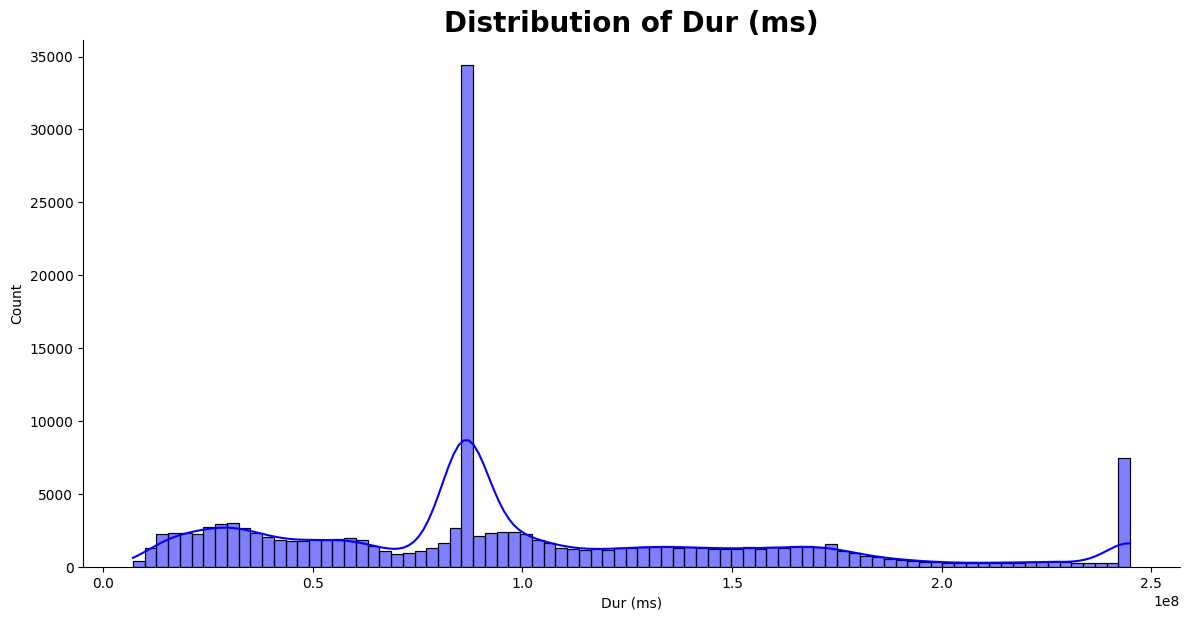

In [5]:
my_plt.hist(df_tele_clean, 'Dur (ms)', 'blue')

In [6]:
#Youtube Data Volume

df_tele_clean[['Youtube Data Volume (Bytes)']].describe()

,Youtube Data Volume (Bytes)
count,1.499960e+05
mean,2.264347e+07
std,9.246932e+06
min,7.890300e+04
25%,1.599842e+07
50%,2.266181e+07
75%,2.929296e+07
max,4.519008e+07


In [7]:
#Netflix Data Volume
df_tele_clean[['Netflix Data Volume (Bytes)']].describe()

,Netflix Data Volume (Bytes)
count,1.499960e+05
mean,2.262848e+07
std,9.260743e+06
min,9.843200e+04
25%,1.597944e+07
50%,2.263559e+07
75%,2.929009e+07
max,4.519815e+07


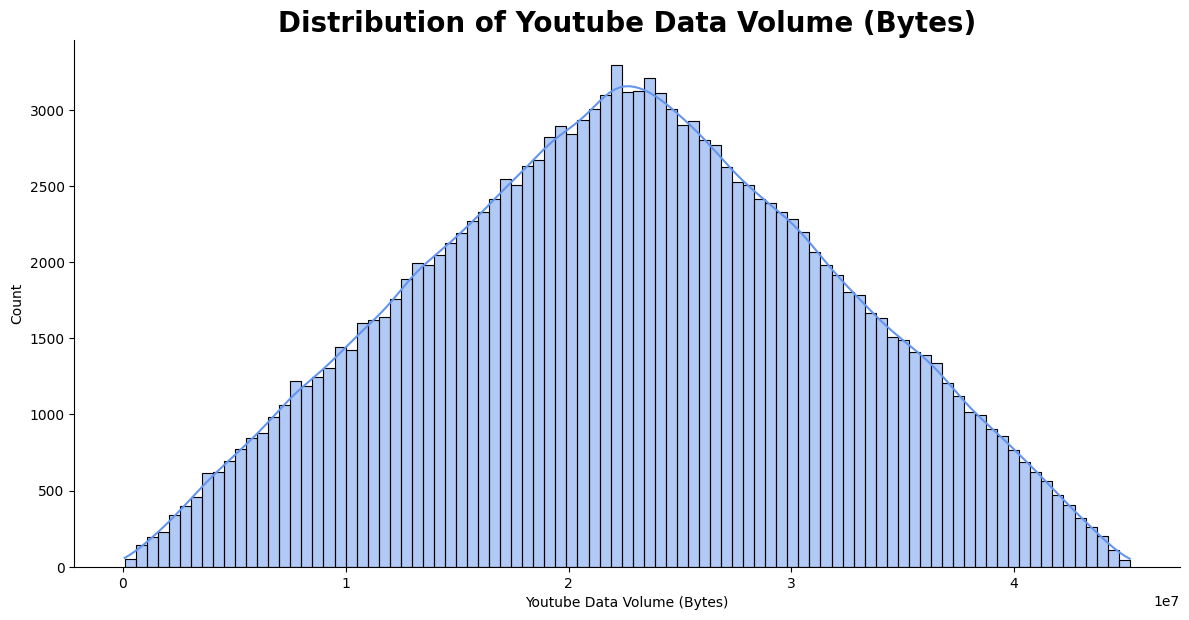

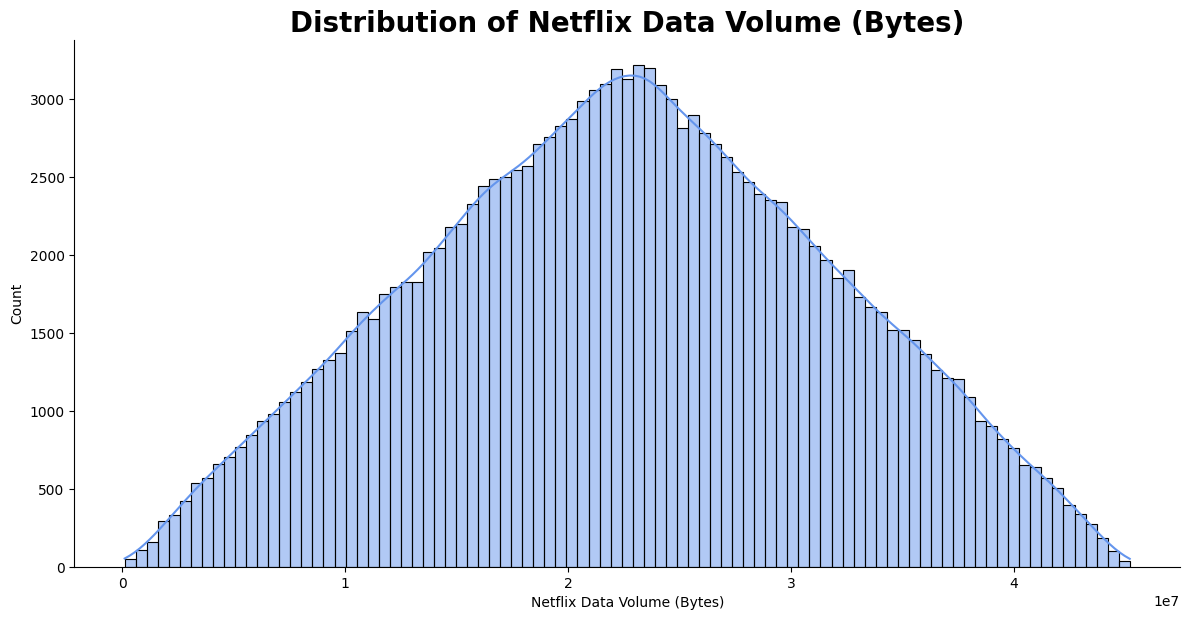

In [8]:
my_plt.hist(df_tele_clean, 'Youtube Data Volume (Bytes)')
my_plt.hist(df_tele_clean, 'Netflix Data Volume (Bytes)')

In [9]:
df_tele_clean[['Gaming Data Volume (Bytes)']].describe()

,Gaming Data Volume (Bytes)
count,1.499960e+05
mean,4.303306e+08
std,2.440230e+08
min,3.063580e+05
25%,2.187247e+08
50%,4.316076e+08
75%,6.414171e+08
max,8.592028e+08


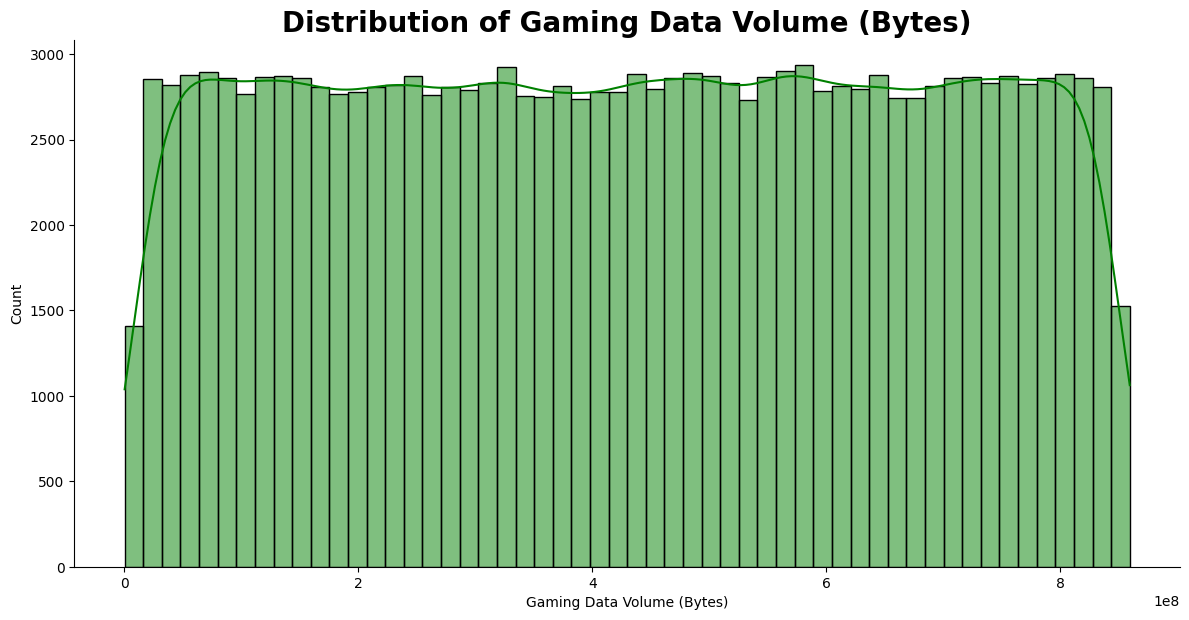

In [10]:
my_plt.hist(df_tele_clean, 'Gaming Data Volume (Bytes)', 'green')

In [11]:
#Email Data Volume
df_tele_clean[['Email Data Volume (Bytes)']].describe()

,Email Data Volume (Bytes)
count,1.499960e+05
mean,2.259111e+06
std,1.071118e+06
min,8.359000e+03
25%,1.359343e+06
50%,2.263598e+06
75%,3.159852e+06
max,4.518036e+06


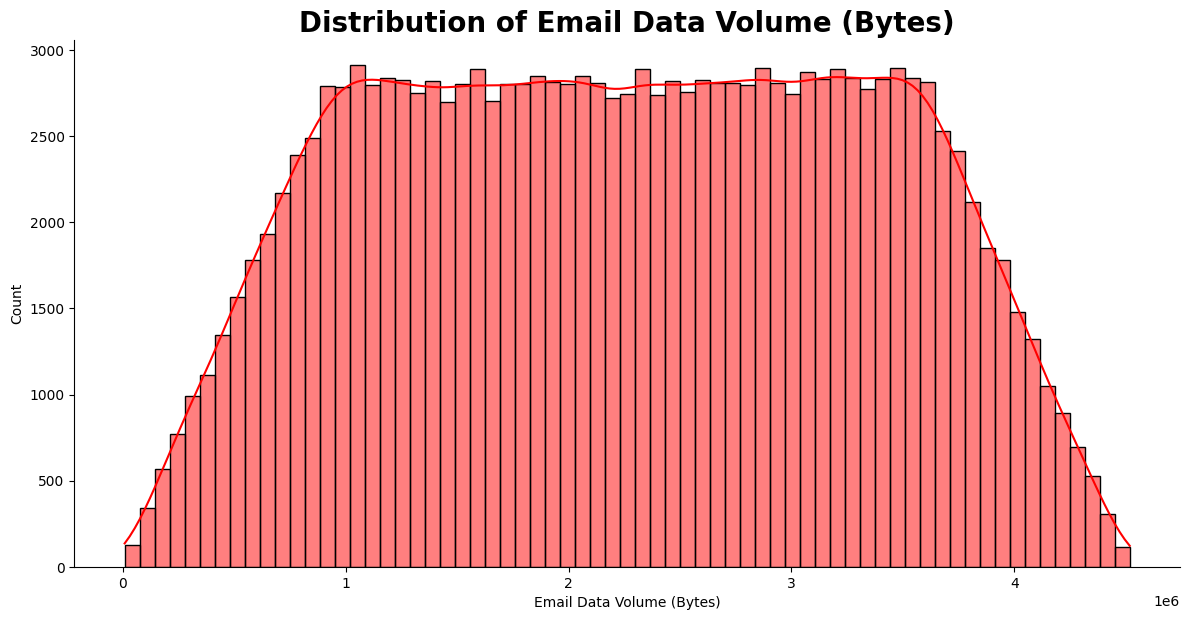

In [12]:
my_plt.hist(df_tele_clean, 'Email Data Volume (Bytes)', 'red')

In [13]:
#Google Data Volume
df_tele_clean[['Google Data Volume (Bytes)']].describe()

,Google Data Volume (Bytes)
count,1.499960e+05
mean,7.807292e+06
std,3.516443e+06
min,4.033000e+04
25%,4.943592e+06
50%,7.812876e+06
75%,1.068285e+07
max,1.552878e+07


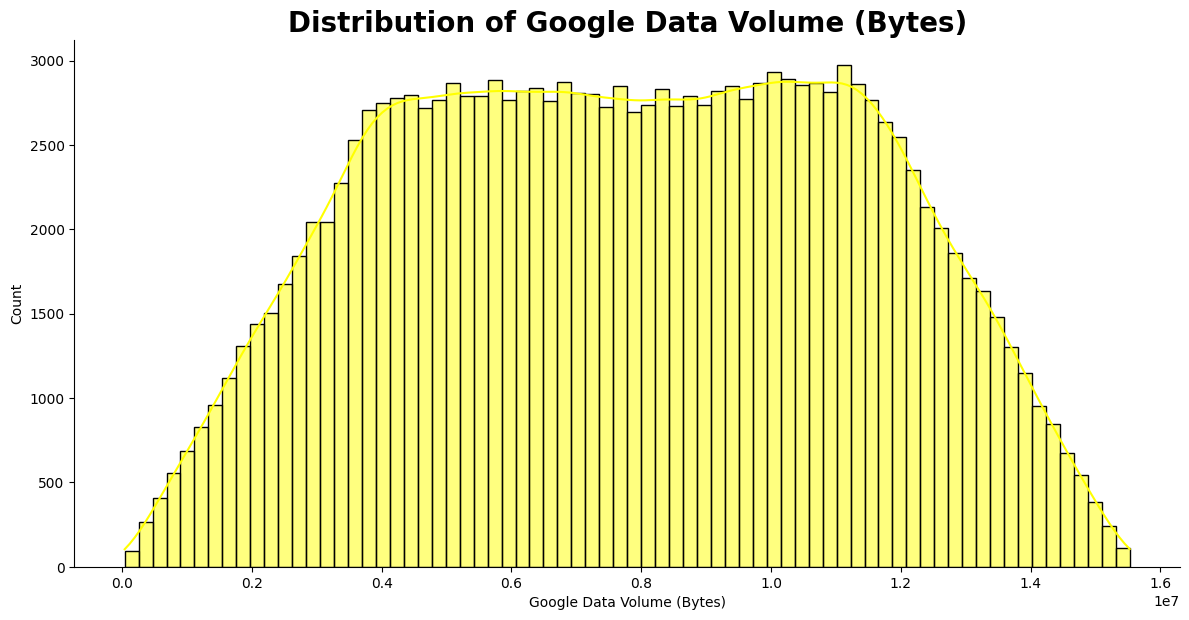

In [14]:
my_plt.hist(df_tele_clean, 'Google Data Volume (Bytes)', 'yellow')

In [15]:
#Social Media Data Volume
df_tele_clean[['Social Media Data Volume (Bytes)']].describe()

,Social Media Data Volume (Bytes)
count,1.499960e+05
mean,1.828246e+06
std,1.035649e+06
min,1.563000e+03
25%,9.322132e+05
50%,1.826442e+06
75%,2.727489e+06
max,3.650861e+06


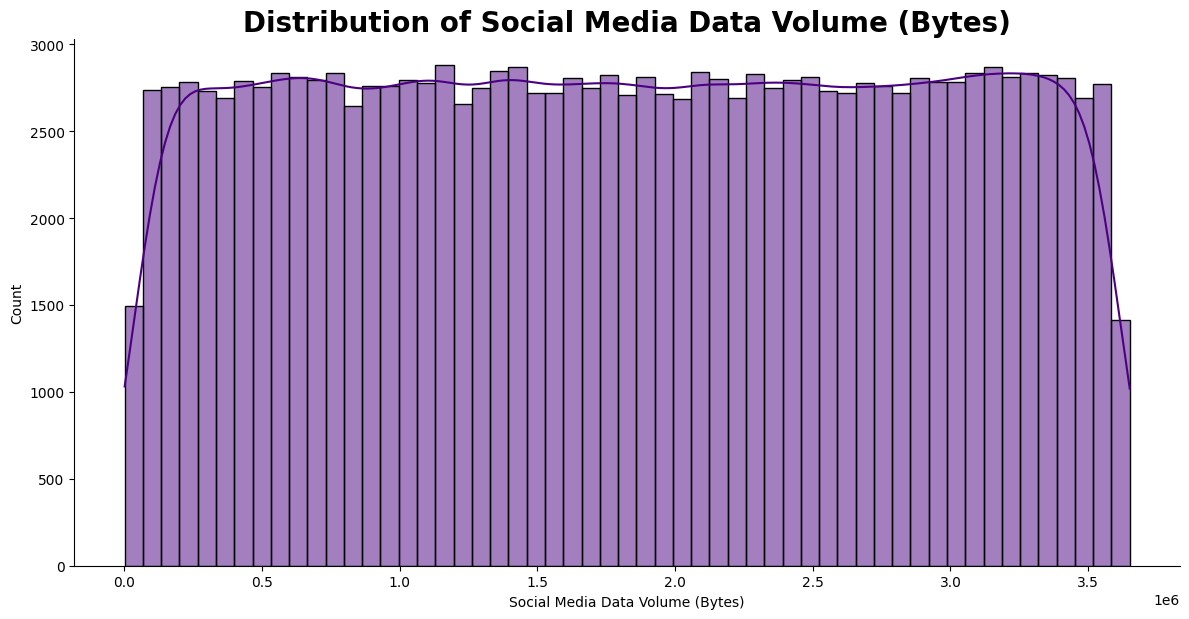

In [16]:
my_plt.hist(df_tele_clean, 'Social Media Data Volume (Bytes)', 'indigo')

In [17]:
#Other Data Volume
df_tele_clean[['Other Data Volume (Bytes)']].describe()

,Other Data Volume (Bytes)
count,1.499960e+05
mean,4.293656e+08
std,2.432654e+08
min,1.490450e+05
25%,2.185549e+08
50%,4.299923e+08
75%,6.399271e+08
max,8.595209e+08


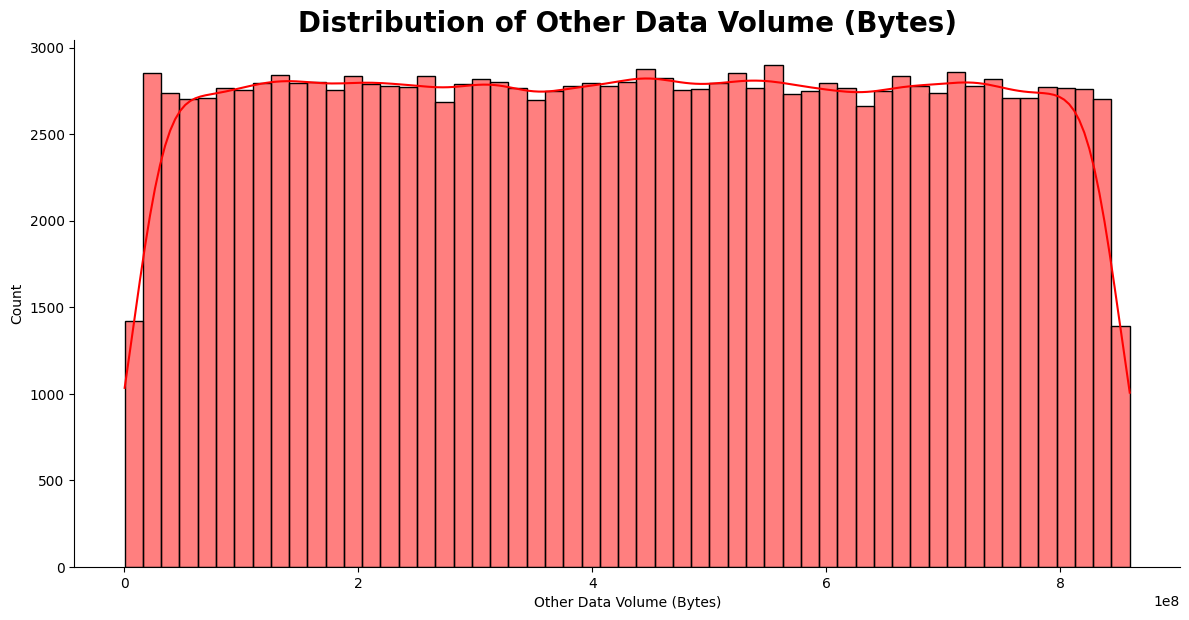

In [18]:
my_plt.hist(df_tele_clean, 'Other Data Volume (Bytes)', 'red')

In [19]:
#Total Volume
df_tele_clean[['Total Data Volume (Bytes)']].describe()

,Total Data Volume (Bytes)
count,1.499960e+05
mean,4.957621e+08
std,2.443835e+08
min,2.895611e+07
25%,2.844721e+08
50%,4.968788e+08
75%,7.065059e+08
max,9.536245e+08


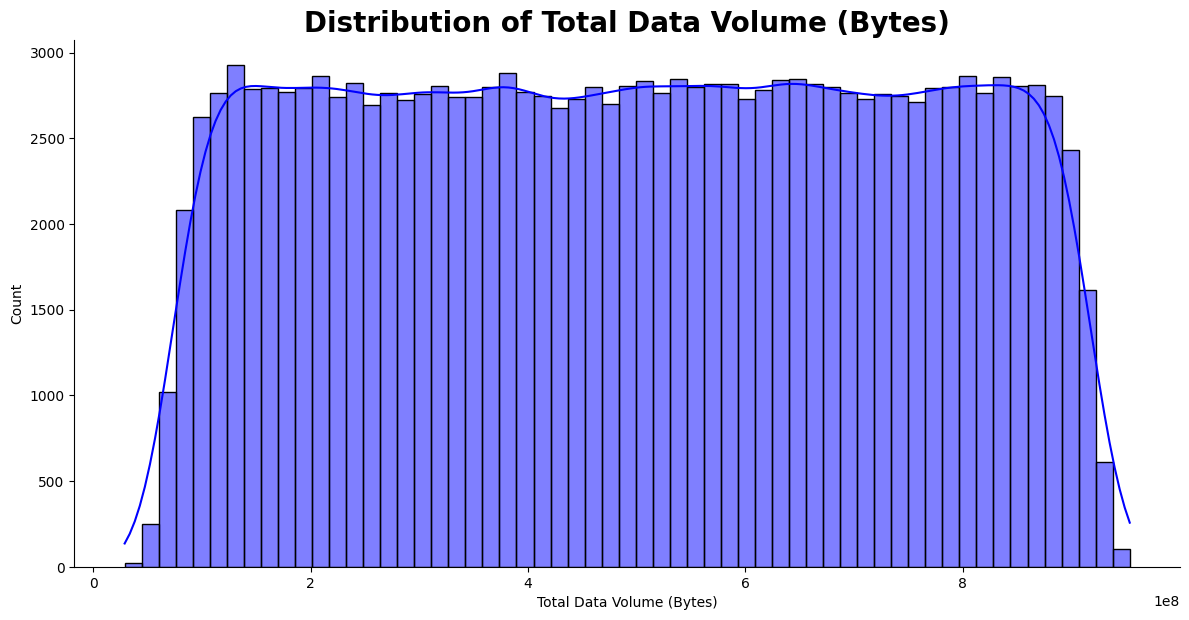

In [20]:
my_plt.hist(df_tele_clean, 'Total Data Volume (Bytes)', 'blue')

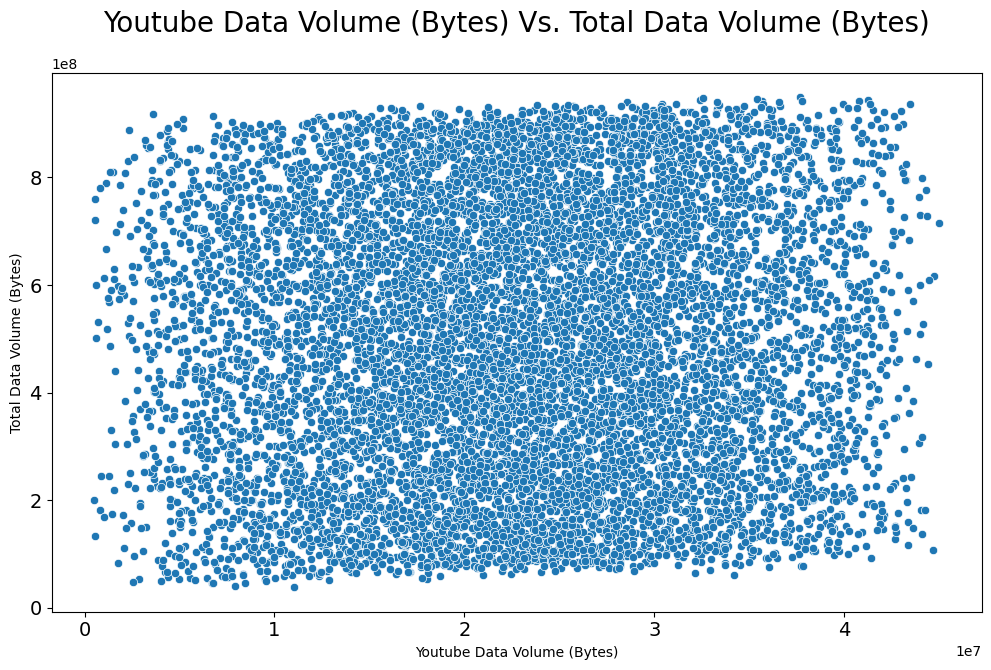

In [21]:
#Youtube Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Youtube Data Volume (Bytes)', 'Total Data Volume (Bytes)')

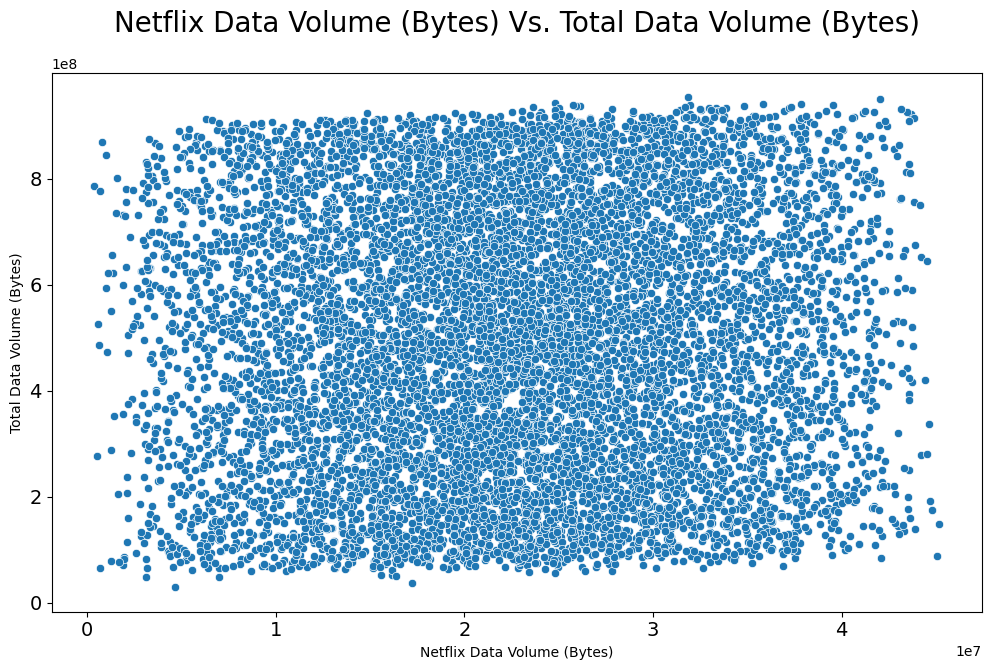

In [22]:
#Netflix Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Netflix Data Volume (Bytes)', 'Total Data Volume (Bytes)')

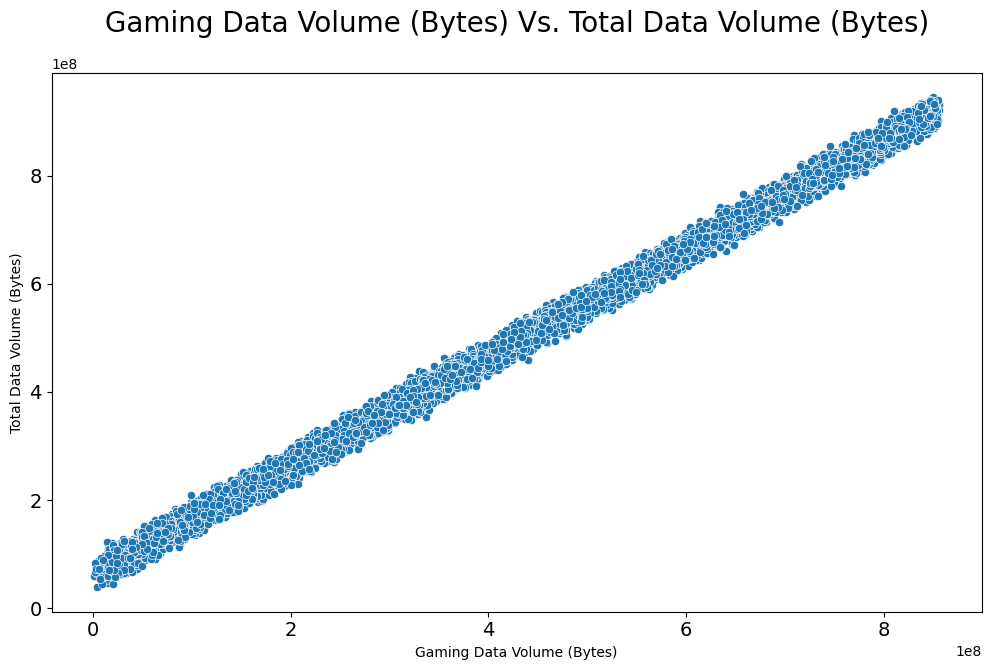

In [23]:
#Gaming Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Gaming Data Volume (Bytes)', 'Total Data Volume (Bytes)')

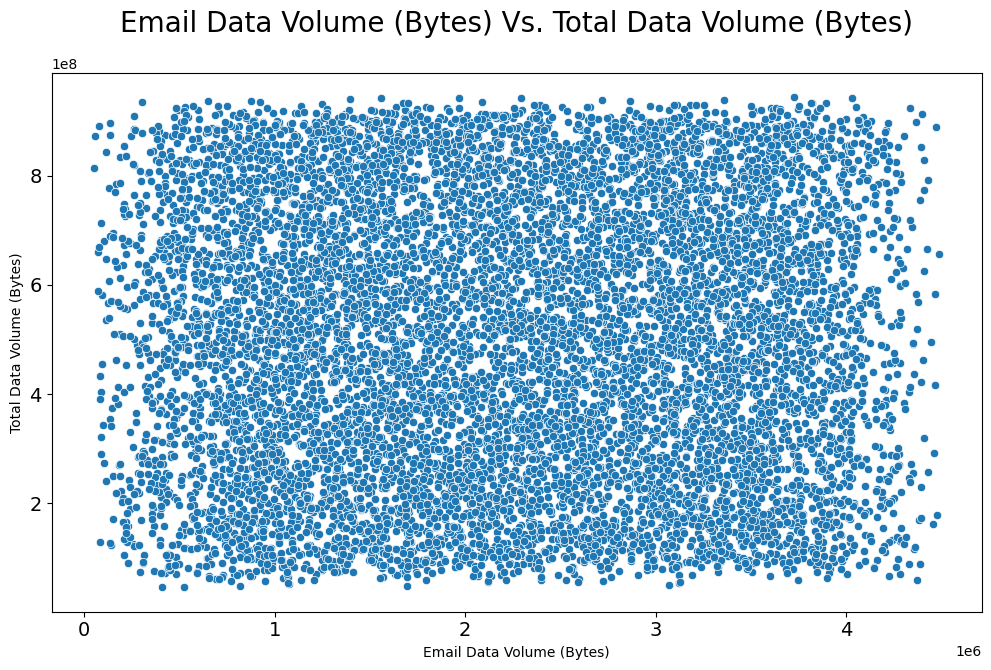

In [24]:
#Email Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Email Data Volume (Bytes)', 'Total Data Volume (Bytes)')

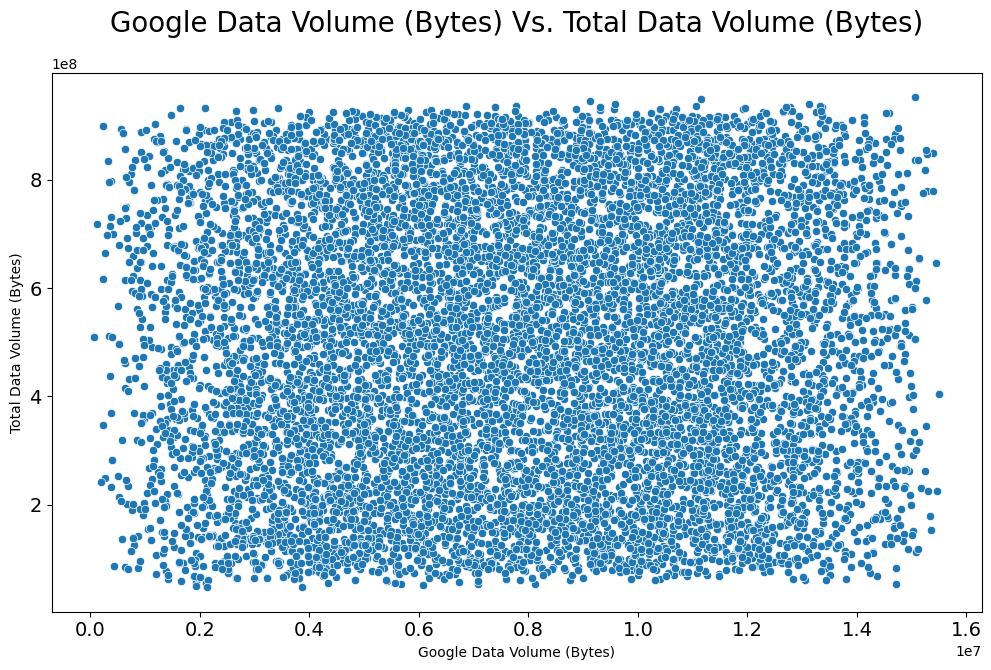

In [26]:
#Google Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Google Data Volume (Bytes)', 'Total Data Volume (Bytes)')

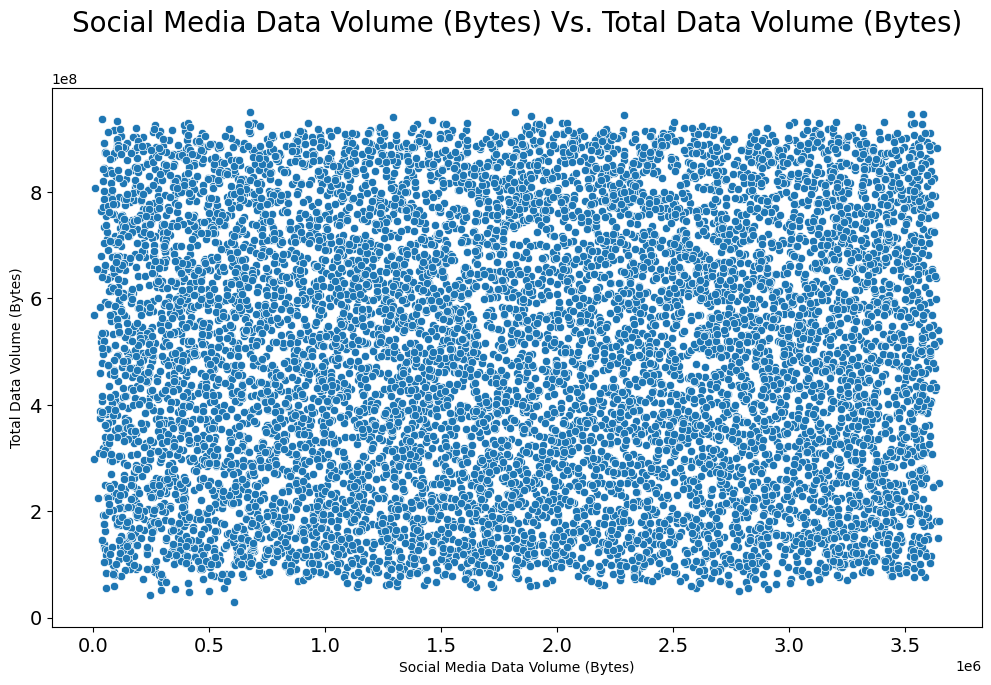

In [27]:
#Social Media Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Social Media Data Volume (Bytes)', 'Total Data Volume (Bytes)')

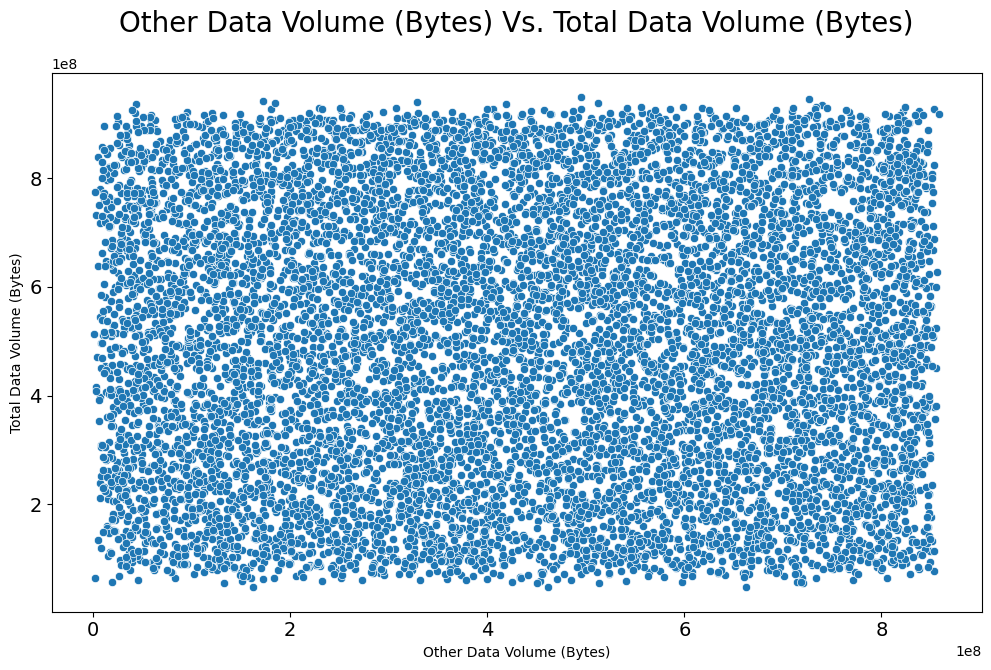

In [28]:
#Other Data Volume Vs Total Data Volume
my_plt.scatter(df_tele_clean.sample(10000), 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)')

#### Correlation Analysis

In [29]:
df_corr = df_tele_clean[[
    'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)', 'Email Data Volume (Bytes)',
    'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)', 'Gaming Data Volume (Bytes)',
    'Other Data Volume (Bytes)']
].corr()
df_corr

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
Social Media Data Volume (Bytes),1.000000,-0.001722,0.004052,0.000538,0.000981,0.001075,0.006085
Google Data Volume (Bytes),-0.001722,1.000000,-0.000400,0.002271,-0.001907,-0.000992,-0.001707
Email Data Volume (Bytes),0.004052,-0.000400,1.000000,-0.002911,0.001047,-0.000637,-0.001322
Youtube Data Volume (Bytes),0.000538,0.002271,-0.002911,1.000000,0.002875,-0.003002,0.002984
Netflix Data Volume (Bytes),0.000981,-0.001907,0.001047,0.002875,1.000000,-0.003122,-0.009030
Gaming Data Volume (Bytes),0.001075,-0.000992,-0.000637,-0.003002,-0.003122,1.000000,-0.002655
Other Data Volume (Bytes),0.006085,-0.001707,-0.001322,0.002984,-0.009030,-0.002655,1.000000


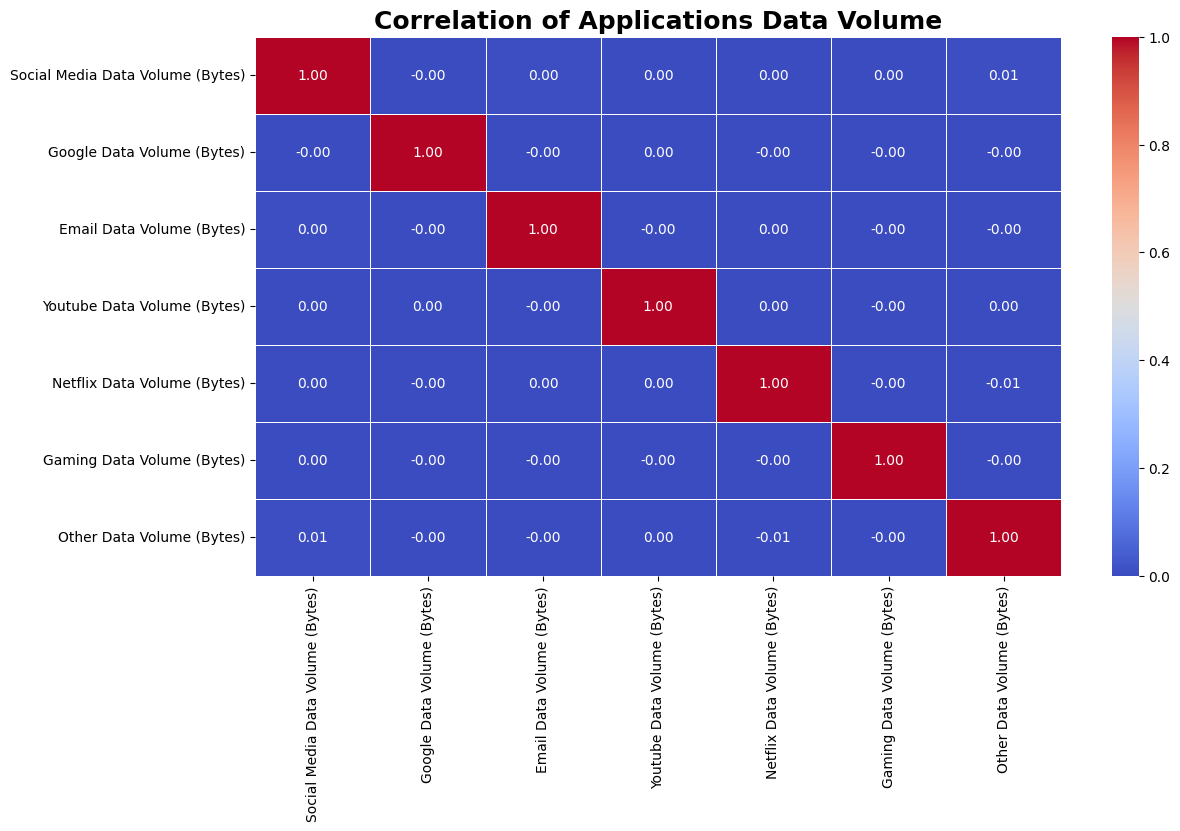

In [30]:
my_plt.heatmap(df_corr, "Correlation of Applications Data Volume")
#We can conclude that no correlation exist among the data usage applications

In [31]:
#Top 10 Handset types
df_tele_clean['Handset Type'].value_counts().head(10)

Handset Type
Huawei B528S-23A                19790
Apple iPhone 6S (A1688)          9462
Apple iPhone 6 (A1586)           9056
undefined                        9013
Apple iPhone 7 (A1778)           6352
Apple iPhone Se (A1723)          5217
Apple iPhone 8 (A1905)           5021
Apple iPhone Xr (A2105)          4588
Samsung Galaxy S8 (Sm-G950F)     4535
Apple iPhone X (A1901)           3821
Name: count, dtype: int64

In [32]:
#Handset Manufacturers
df_top_3_manfacturers = df_tele_clean[['Handset Manufacturer']].value_counts().head(3)
df_top_3_manfacturers

Handset Manufacturer
Apple                   59813
Samsung                 40990
Huawei                  34528
Name: count, dtype: int64

<Axes: title={'center': 'Top Handset Manufacturer'}, ylabel='count'>

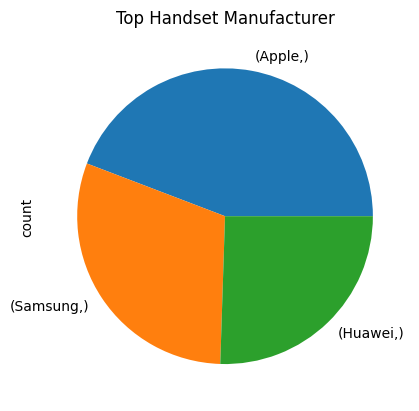

In [33]:
df_tele_clean[['Handset Manufacturer']].value_counts().head(3).plot(kind='pie', title="Top Handset Manufacturer")

In [34]:
df_top_3_manf = df_tele_clean['Handset Manufacturer'].value_counts().head(3)

#Top 5 handsets per top 3 handset manufacturer
df_top_3_manf = df_tele_clean[df_tele_clean["Handset Manufacturer"].isin(df_top_3_manf.index.tolist())]
top_handsets = df_top_3_manf['Handset Type'].groupby(df_tele_clean['Handset Manufacturer']).apply(lambda x: x.value_counts().head(5))
top_handsets

Handset Manufacturer                                
Apple                 Apple iPhone 6S (A1688)            9462
                      Apple iPhone 6 (A1586)             9056
                      Apple iPhone 7 (A1778)             6352
                      Apple iPhone Se (A1723)            5217
                      Apple iPhone 8 (A1905)             5021
Huawei                Huawei B528S-23A                  19790
                      Huawei E5180                       2082
                      Huawei P20 Lite Huawei Nova 3E     2031
                      Huawei P20                         1485
                      Huawei Y6 2018                     1000
Samsung               Samsung Galaxy S8 (Sm-G950F)       4535
                      Samsung Galaxy A5 Sm-A520F         3732
                      Samsung Galaxy J5 (Sm-J530)        3704
                      Samsung Galaxy J3 (Sm-J330)        3496
                      Samsung Galaxy S7 (Sm-G930X)       3207
Name: Handset Typ

In [35]:
number_of_xdr = df_tele_clean.groupby('MSISDN/Number')['MSISDN/Number'].agg('count').reset_index(name='Bearer Id').sort_values(by='Bearer Id',
        ascending=False)

number_of_xdr.rename(columns={number_of_xdr.columns[1]: 'number of xDR sessions'}, inplace=True)
number_of_xdr

,MSISDN/Number,number of xDR sessions
13524,33626320676,18
6437,33614892860,17
13178,33625779332,17
37049,33659725664,16
76360,33675877202,15
...,...,...
106844,33789955678,1
106842,33789942399,1
106841,33789922012,1
106840,33789914862,1


In [36]:
session_duration_per_user = df_tele_clean.groupby('MSISDN/Number').agg({'Dur (ms)': 'mean'})
session_duration_per_user.rename(
        columns={'Dur (ms)': 'Average session duration (ms)'}, inplace=True)
session_duration_per_user.sort_values(by=['Average session duration (ms)'], ascending=False).head(10)

,Average session duration (ms)
MSISDN/Number,
33659080607,2.449235e+08
33789585099,2.449235e+08
882397108489451,2.449235e+08
33664506433,2.449235e+08
33699815202,2.449235e+08
33659101480,2.449235e+08
33610927611,2.449235e+08
33625212373,2.449235e+08
33625191687,2.449235e+08


In [37]:
df_tele_clean['Total UL (Bytes)'] = df_tele_clean['Total UL (Bytes)'].astype("int64")
df_tele_clean['Total DL (Bytes)'] = df_tele_clean['Total DL (Bytes)'].astype("int64")
df_tele_clean['Total Data Volume (Bytes)'] = df_tele_clean['Total Data Volume (Bytes)'].astype("int64")
total_data = df_tele_clean.groupby('MSISDN/Number')[[ 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].sum()
total_data.nlargest(105716, 'Total Data Volume (Bytes)')

,Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,689483001,8156743493,8846226494
33760536639,703478581,7811295382,8514773963
33625779332,729577380,7770043342,8499620722
33626320676,669650721,7301516540,7971167261
33675877202,581568792,7309541816,7891110608
...,...,...,...
33679892842,46121081,37295784,83416865
33698150030,42536664,40877375,83414039
33612445195,28970541,54417221,83387762


In [38]:
apps_total = df_tele_clean.groupby('MSISDN/Number')[['Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)', 'Total Data Volume (Bytes)']].sum()
apps_total.nlargest(10, 'Total Data Volume (Bytes)')

,Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes),Total Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33614892860,28294544.0,127973787.0,40788634.0,394370218.0,361401046.0,7.749432e+09,7.639264e+09,8846226494
33760536639,39783189.0,123223099.0,33693767.0,396289198.0,334643269.0,7.461045e+09,4.716134e+09,8514773963
33625779332,27135500.0,142307915.0,40633966.0,452958769.0,356980607.0,7.326673e+09,6.354583e+09,8499620722
33626320676,43374779.0,152191852.0,42418782.0,374483047.0,328725740.0,6.887572e+09,8.167878e+09,7971167261
33675877202,19222921.0,109860502.0,31514421.0,317410572.0,309093159.0,6.970568e+09,6.798515e+09,7891110608
33659725664,35412358.0,116516345.0,35999792.0,257991088.0,399519079.0,6.725559e+09,6.317415e+09,7705862783
33666464084,18629986.0,89320737.0,25557139.0,227336012.0,214416926.0,6.646303e+09,4.349141e+09,7308500938
33760413819,20777205.0,82738720.0,25576965.0,303169107.0,318347546.0,6.268620e+09,4.101645e+09,7132370514
33664712899,19390599.0,90389372.0,21426007.0,276834013.0,251798809.0,6.103856e+09,3.976960e+09,6872346760


### Variable Transformation

In [39]:
# creating deciles based on the 'Dur (ms)' (duration in milliseconds) column
df_tele_decile = df_tele_clean.copy()
df_tele_decile['Decile'] = pd.qcut(df_tele_decile['Dur (ms)'], 10, labels=False)
# aggregate the sum of 'Dur (ms)' and 'Total Data Volume (Bytes)' for each decile
df_tele_decile =  df_tele_decile.groupby(['Decile']).agg({'Dur (ms)': "sum","Total Data Volume (Bytes)": "sum"}).sort_values(by='Dur (ms)',ascending=False)
df_tele_decile

,Dur (ms),Total Data Volume (Bytes)
Decile,,
9,3.390463e+12,7459603810076
8,2.467028e+12,7458468858523
7,1.985044e+12,7416575193900
6,1.536361e+12,7436946842335
5,1.305185e+12,7386799404368
4,1.293839e+12,7395105110044
3,1.258619e+12,7450034838239
2,8.646432e+11,7475216897937
1,5.397946e+11,7445199061116


In [40]:
# Separating Numerical Columns
df_float = df_tele_clean.select_dtypes(include=[float])
df_int = df_tele_clean.select_dtypes(include=[int])

# Combining Numerical Columns into a List:

df = df_tele_clean
number_array = df_float.columns.to_list() + df_int.columns.to_list()
number_array

# Standardizing Features:
# features is assigned the list of column names (number_array).
features = number_array
# Separating out the features
x = df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [41]:
# Principal Component Analysis (PCA) to reduce the dimensionality of your standardized features (x) to 20 principal components
number = 20
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#The resulting DataFrame principal Df contains the principal components, 
# and each column corresponds to one of the 20 principal components.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-2.704700,-1.217080,-1.032378,1.875809,-1.585639,2.351551,-0.626324,-0.965103,-1.138285,0.063782,-0.419130,-1.110702,-0.944807,1.211940,0.123674,0.112281,-0.129843,0.419256,-0.463704,-2.370365
1,-2.422264,1.680418,2.968752,2.256863,0.260917,-0.504876,-2.187880,0.750978,-0.107805,-0.141194,1.402242,-0.846581,-1.182446,-0.091296,-1.678015,-1.673405,-0.069246,-1.110662,-0.454185,0.010403
2,-2.346818,-1.529599,-0.074837,2.254548,-0.387211,0.405538,1.639866,-0.529252,-0.486157,-0.312170,2.819753,-0.438150,-1.232504,-0.648134,-0.400362,-0.074940,-0.600930,-0.170060,-0.029914,1.138199
3,-2.468048,3.195054,0.525723,3.018901,0.599721,-2.359031,1.220696,-1.230383,0.646832,-0.056249,0.501118,-0.600479,-1.285818,-0.549988,0.365383,-0.226193,-0.401316,-1.955771,0.413239,-0.406709
4,-2.377592,0.887184,0.181338,2.669562,-0.054562,-1.193486,-0.070426,-1.054055,-0.190734,-0.091022,0.928884,-0.527800,-1.072520,1.554283,-1.892262,0.938631,-1.642138,-0.930138,-0.511242,0.235248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,-1.824965,-1.225298,2.121119,-0.915293,-2.300782,-0.598336,0.614214,1.193352,1.619706,0.221311,-0.829052,2.084904,2.641213,0.534985,-0.257539,0.641499,-0.479160,-0.090178,1.664257,0.511081
149992,-1.738647,-3.143911,0.879711,1.683315,2.294533,-2.345488,-0.856203,-0.578282,-0.154761,0.088806,-0.036872,2.374254,1.416328,-0.488157,0.523378,-0.146657,0.541383,-0.892970,2.516798,0.589839
149993,-1.816761,1.367520,1.801260,0.437084,-1.700531,0.873749,1.513901,1.940729,0.335480,-0.034548,1.857590,2.373900,1.303296,-1.071429,-0.324708,-2.198753,0.010397,-0.754795,0.456150,0.195419
149994,-1.340037,3.431626,3.127657,1.895530,0.946516,-2.027885,-0.310041,-1.046408,0.927295,0.068659,0.342667,3.091871,0.926585,-1.655017,0.003867,0.528235,-2.304686,-0.492060,-0.244430,-1.087280


In [42]:
# Calculates the cumulative explained variance ratio using the first 20 principal components. 
# This value represents the proportion of the total variance in the original data that is retained by these 20 principal components.

pca.explained_variance_ratio_.sum()

np.float64(0.8592096595518963)

In [43]:
# Principal Component Analysis (PCA) to reduce the dimensionality of your standardized features (x) to 30 principal components
number = 30
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-2.704700,-1.217080,-1.032378,1.875809,-1.585639,2.351551,-0.626324,-0.965103,-1.138285,0.063782,...,-1.943351,-1.919156,0.152735,0.388516,-0.464578,-0.077603,-0.013574,0.066020,0.055422,-0.067635
1,-2.422264,1.680418,2.968752,2.256863,0.260917,-0.504876,-2.187880,0.750978,-0.107805,-0.141194,...,-1.700746,-1.867379,-1.026518,1.070155,-0.562334,-0.132916,0.006492,-0.170465,0.022827,0.002489
2,-2.346818,-1.529599,-0.074837,2.254548,-0.387211,0.405538,1.639866,-0.529252,-0.486157,-0.312170,...,-1.738437,-1.856259,-1.710348,2.103090,-0.638193,-0.050235,-0.053203,-0.327590,-0.262678,0.159113
3,-2.468048,3.195054,0.525723,3.018901,0.599721,-2.359031,1.220696,-1.230383,0.646832,-0.056249,...,-2.035626,-1.861417,0.764367,2.047215,-0.602754,-0.023200,-0.037156,-0.276413,-0.350459,0.157861
4,-2.377592,0.887184,0.181338,2.669562,-0.054562,-1.193486,-0.070426,-1.054055,-0.190734,-0.091022,...,-1.654171,-1.790103,-1.075267,2.072854,-0.624114,-0.035410,-0.020444,-0.317642,-0.275155,0.154992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,-1.824965,-1.225298,2.121119,-0.915293,-2.300782,-0.598336,0.614214,1.193352,1.619706,0.221311,...,0.711442,1.408195,0.733501,-1.126005,0.344291,-0.170421,0.092994,0.026588,0.036005,0.092816
149992,-1.738647,-3.143911,0.879711,1.683315,2.294533,-2.345488,-0.856203,-0.578282,-0.154761,0.088806,...,-0.876526,2.007009,-1.412099,-0.962690,0.049964,-0.365390,0.134741,0.039011,0.025612,0.122315
149993,-1.816761,1.367520,1.801260,0.437084,-1.700531,0.873749,1.513901,1.940729,0.335480,-0.034548,...,-0.952141,1.826356,-1.044623,-0.558788,0.010165,-0.294556,0.095973,0.209864,-0.067352,0.118460
149994,-1.340037,3.431626,3.127657,1.895530,0.946516,-2.027885,-0.310041,-1.046408,0.927295,0.068659,...,-0.963971,1.909457,-0.374992,1.436670,-0.182918,-0.279828,0.041992,-0.068398,-0.473419,0.381908


In [44]:
# Calculates the cumulative explained variance ratio using the first 20 principal components. 
# This value represents the proportion of the total variance in the original data that is retained by these 20 principal components.

pca.explained_variance_ratio_.sum()

np.float64(0.9914382726667282)

In [45]:
number = 40
number_array = range(0,number)
pca = PCA(n_components=number)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = number_array)
principalDf
#Setting the dimension number to 40

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-2.704700,-1.217080,-1.032378,1.875809,-1.585639,2.351551,-0.626324,-0.965103,-1.138285,0.063782,...,0.012052,0.021217,-0.003523,-0.018806,-0.006637,-0.015031,-0.000234,-8.587736e-06,2.289671e-14,-8.707908e-14
1,-2.422264,1.680418,2.968752,2.256863,0.260917,-0.504876,-2.187880,0.750978,-0.107805,-0.141194,...,-0.037711,0.038002,0.315403,-0.050696,0.209129,-0.036092,0.000372,-8.771516e-06,2.144798e-14,-8.115014e-14
2,-2.346818,-1.529599,-0.074837,2.254548,-0.387211,0.405538,1.639866,-0.529252,-0.486157,-0.312170,...,0.000714,0.010892,0.240797,-0.037103,0.133417,-0.031737,-0.000693,-8.557719e-06,2.402224e-14,-9.113747e-14
3,-2.468048,3.195054,0.525723,3.018901,0.599721,-2.359031,1.220696,-1.230383,0.646832,-0.056249,...,0.080410,-0.021847,-0.036620,-0.012515,0.054355,0.008811,0.000220,-8.336661e-06,2.088381e-14,-7.747974e-14
4,-2.377592,0.887184,0.181338,2.669562,-0.054562,-1.193486,-0.070426,-1.054055,-0.190734,-0.091022,...,0.016422,0.003655,0.192361,-0.032769,0.119639,-0.032103,-0.000148,-8.568754e-06,2.150937e-14,-8.361992e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149991,-1.824965,-1.225298,2.121119,-0.915293,-2.300782,-0.598336,0.614214,1.193352,1.619706,0.221311,...,-0.008991,0.005559,0.047124,0.039435,-0.010839,0.002420,0.000840,4.949624e-07,-2.073740e-15,1.473085e-14
149992,-1.738647,-3.143911,0.879711,1.683315,2.294533,-2.345488,-0.856203,-0.578282,-0.154761,0.088806,...,-0.012928,-0.004031,0.024370,0.040085,-0.017725,0.006888,0.000357,-9.732126e-08,1.855919e-15,1.704004e-15
149993,-1.816761,1.367520,1.801260,0.437084,-1.700531,0.873749,1.513901,1.940729,0.335480,-0.034548,...,-0.015633,-0.017896,0.001834,0.047669,-0.011138,0.004179,0.000049,-7.724902e-07,1.616429e-15,-6.512397e-15
149994,-1.340037,3.431626,3.127657,1.895530,0.946516,-2.027885,-0.310041,-1.046408,0.927295,0.068659,...,0.073741,-0.064479,-0.003312,0.059867,0.023118,-0.003231,0.000709,-3.844728e-06,6.659251e-15,-2.760213e-14


In [46]:
pca.explained_variance_ratio_

array([1.95158097e-01, 8.50852429e-02, 5.42150027e-02, 4.37171692e-02,
       4.29190695e-02, 4.28001741e-02, 4.25686776e-02, 4.22328482e-02,
       4.20538474e-02, 3.12480746e-02, 3.10039843e-02, 2.99431442e-02,
       2.47812616e-02, 2.38553436e-02, 2.14748856e-02, 2.13309427e-02,
       2.13050956e-02, 2.12421741e-02, 2.12168064e-02, 2.10578179e-02,
       1.95199514e-02, 1.89268440e-02, 1.86935663e-02, 1.74363835e-02,
       1.26092965e-02, 1.16092907e-02, 1.12698121e-02, 9.80134922e-03,
       8.36736771e-03, 3.99475170e-03, 2.84306799e-03, 2.32690515e-03,
       1.51067970e-03, 7.84182524e-04, 6.97220996e-04, 3.99115038e-04,
       5.55934597e-07, 4.39372282e-13, 4.02524158e-17, 2.08270609e-17])

In [47]:
pca.explained_variance_ratio_.sum()

np.float64(1.0)